本案例仅仅用于演示和测试`alphalens`包，策略本身并没有实际意义

In [1]:
%load_ext zipline

In [2]:
# 暂时只能处理跨年度的数据（滚动处理问题?

### 运行策略

In [3]:
%%zipline --start 2015-1-1 --end 2018-5-2 -o result.pkl

import talib
import numpy as np
import math
import logbook

from zipline.api import *
from zipline.pipeline.fundamentals import Fundamentals
from zipline.pipeline import Pipeline
from zipline.pipeline.builtin import TopAverageAmount
from zipline.pipeline.factors import RSI

from zipline.finance import commission, slippage

log = logbook.Logger('RSI')


def make_pipeline():

    return Pipeline(
        columns={
            'rsi': RSI(window_length=15),
            'sector': Fundamentals.info.sector_code.latest,
        },
        # 只选择成交额前500位的股票
        screen=TopAverageAmount(50))


# Setup our variables
def initialize(context):
    # 设置手续费及滑点
    set_commission(commission.PerShare(cost=0))
    set_slippage(slippage.FixedSlippage(spread=0))
    
    context.max_notional = 100000
    context.intc = sid(333)  #symbols(['000333','000002','300017'])
    context.LOW_RSI = 30
    context.HIGH_RSI = 70
    attach_pipeline(make_pipeline(), 'rsi_pipeline')
    schedule_function(rebalance, date_rules.every_day(),
                      time_rules.market_open())


def before_trading_start(context, data):
    #context.output = pipeline_output('rsi_pipeline')
    #print(context.output.head())
    pass

def rebalance(context, data):
    # 接收pipeline输出结果
    output = pipeline_output('rsi_pipeline')

    # Get our current positions
    positions = context.portfolio.positions
    
    # 信号触发可卖出和可买入的股票
    signal_sell = output[output['rsi'] > context.HIGH_RSI].index
    signal_buy = output[output['rsi'] < context.LOW_RSI].index
    
    for s in signal_sell:
        # 存在于持有的头寸中
        if s in positions:
            # 清空头寸
            order_target(s, 0)
            # amount代表持仓数量，而非金额
            current_intel_shares = positions[s].amount
            log.info('RSI is at ' + str(s) + ', 卖出 ' +
                     str(current_intel_shares) + ' shares')
            
    for s in signal_buy:
        # 对于信号提示可买入，但尚未买入的股票，买入固定金额
        if s not in positions:
            o = order_target_value(s, context.max_notional)
            log.info('RSI is at ' + str(s) + ', 买入 ' +
                     str(get_order(o).amount) + ' shares')

    # record the current RSI value and the current price of INTC.
    # record(intcRSI=intc_rsi, intcPRICE=data.current(context.intc, 'close'))

/home/ldf/anaconda3/envs/zipline/lib/python3.6/site-packages/empyrical-0.4.2-py3.6.egg/empyrical/stats.py:676: RuntimeWarning: invalid value encountered in true_divide
/home/ldf/anaconda3/envs/zipline/lib/python3.6/site-packages/empyrical-0.4.2-py3.6.egg/empyrical/stats.py:762: RuntimeWarning: invalid value encountered in true_divide


[2018-05-14 12:20:05.600062] INFO: RSI: RSI is at 中联重科(000157), 买入 16638 shares
[2018-05-14 12:20:05.602588] INFO: RSI: RSI is at 长江证券(000783), 买入 7710 shares
[2018-05-14 12:20:05.604903] INFO: RSI: RSI is at 民生银行(600016), 买入 10548 shares
[2018-05-14 12:20:05.614761] INFO: RSI: RSI is at 国金证券(600109), 买入 6227 shares
[2018-05-14 12:20:05.617450] INFO: RSI: RSI is at 中铁工业(600528), 买入 7782 shares
[2018-05-14 12:20:05.619757] INFO: RSI: RSI is at 招商证券(600999), 买入 4407 shares
[2018-05-14 12:20:05.623816] INFO: RSI: RSI is at 太平洋(601099), 买入 8984 shares
[2018-05-14 12:20:05.627375] INFO: RSI: RSI is at 兴业证券(601377), 买入 8445 shares
[2018-05-14 12:20:05.629033] INFO: RSI: RSI is at 中国中铁(601390), 买入 12500 shares
[2018-05-14 12:20:05.631829] INFO: RSI: RSI is at 中国中冶(601618), 买入 23980 shares
[2018-05-14 12:20:05.636823] INFO: RSI: RSI is at 光大证券(601788), 买入 4407 shares
[2018-05-14 12:20:05.663617] INFO: RSI: RSI is at 国电电力(600795), 买入 24636 shares
[2018-05-14 12:20:05.666032] INFO: RSI: RSI is a

/home/ldf/anaconda3/envs/zipline/lib/python3.6/site-packages/empyrical-0.4.2-py3.6.egg/empyrical/stats.py:676: RuntimeWarning: invalid value encountered in true_divide
/home/ldf/anaconda3/envs/zipline/lib/python3.6/site-packages/empyrical-0.4.2-py3.6.egg/empyrical/stats.py:762: RuntimeWarning: invalid value encountered in true_divide
/home/ldf/anaconda3/envs/zipline/lib/python3.6/site-packages/empyrical-0.4.2-py3.6.egg/empyrical/stats.py:762: RuntimeWarning: divide by zero encountered in true_divide


[2018-05-14 12:20:05.866910] INFO: RSI: RSI is at 平安银行(000001), 买入 7251 shares
[2018-05-14 12:20:05.868991] INFO: RSI: RSI is at 华夏银行(600015), 买入 8438 shares
[2018-05-14 12:20:05.871163] INFO: RSI: RSI is at 中国石化(600028), 买入 17152 shares
[2018-05-14 12:20:05.873321] INFO: RSI: RSI is at 招商银行(600036), 买入 6983 shares
[2018-05-14 12:20:05.877736] INFO: RSI: RSI is at 兴业银行(601166), 买入 7077 shares
[2018-05-14 12:20:05.879793] INFO: RSI: RSI is at 华泰证券(601688), 买入 4566 shares
[2018-05-14 12:20:05.882151] INFO: RSI: RSI is at 光大银行(601818), 买入 24813 shares
[2018-05-14 12:20:05.883787] INFO: RSI: RSI is at 建设银行(601939), 买入 17730 shares
[2018-05-14 12:20:05.918543] INFO: RSI: RSI is at 浦发银行(600000), 买入 7097 shares
[2018-05-14 12:20:05.920738] INFO: RSI: RSI is at 农业银行(601288), 买入 31055 shares
[2018-05-14 12:20:05.922052] INFO: RSI: RSI is at 交通银行(601328), 买入 16949 shares
[2018-05-14 12:20:05.923865] INFO: RSI: RSI is at 工商银行(601398), 买入 23255 shares
[2018-05-14 12:20:05.925542] INFO: RSI: RSI is

[2018-05-14 12:20:07.665837] INFO: RSI: RSI is at 浦发银行(600000), 买入 6285 shares
[2018-05-14 12:20:07.667803] INFO: RSI: RSI is at 包钢股份(600010), 买入 20833 shares
[2018-05-14 12:20:07.670381] INFO: RSI: RSI is at 保利地产(600048), 买入 9442 shares
[2018-05-14 12:20:07.672172] INFO: RSI: RSI is at 北方稀土(600111), 买入 5955 shares
[2018-05-14 12:20:07.675013] INFO: RSI: RSI is at 海螺水泥(600585), 买入 5063 shares
[2018-05-14 12:20:07.677225] INFO: RSI: RSI is at 中航资本(600705), 买入 4582 shares
[2018-05-14 12:20:07.678875] INFO: RSI: RSI is at 招商证券(600999), 买入 4137 shares
[2018-05-14 12:20:07.680441] INFO: RSI: RSI is at 中国建筑(601668), 买入 13123 shares
[2018-05-14 12:20:07.681460] INFO: RSI: RSI is at 华泰证券(601688), 买入 4743 shares
[2018-05-14 12:20:07.683021] INFO: RSI: RSI is at 中国重工(601989), 买入 7002 shares
[2018-05-14 12:20:07.719709] INFO: RSI: RSI is at 万 科Ａ(000002), 买入 6887 shares
[2018-05-14 12:20:07.721786] INFO: RSI: RSI is at 苏宁易购(002024), 买入 6535 shares
[2018-05-14 12:20:07.724219] INFO: RSI: RSI is at 

[2018-05-14 12:20:10.767986] INFO: RSI: RSI is at 中国中铁(601390), 卖出 11061 shares
[2018-05-14 12:20:10.769133] INFO: RSI: RSI is at 中国建筑(601668), 卖出 13123 shares
[2018-05-14 12:20:10.980232] INFO: RSI: RSI is at 乐视网(300104), 卖出 1779 shares
[2018-05-14 12:20:10.982139] INFO: RSI: RSI is at 农业银行(601288), 买入 32154 shares
[2018-05-14 12:20:10.983517] INFO: RSI: RSI is at 交通银行(601328), 买入 15948 shares
[2018-05-14 12:20:11.113455] INFO: RSI: RSI is at 河钢股份(000709), 买入 32154 shares
[2018-05-14 12:20:11.238713] INFO: RSI: RSI is at 万向钱潮(000559), 卖出 6253 shares
[2018-05-14 12:20:11.285363] INFO: RSI: RSI is at 沈阳机床(000410), 卖出 6060 shares
[2018-05-14 12:20:11.286352] INFO: RSI: RSI is at 海虹控股(000503), 卖出 3898 shares
[2018-05-14 12:20:11.287514] INFO: RSI: RSI is at 中航飞机(000768), 卖出 3949 shares
[2018-05-14 12:20:11.288709] INFO: RSI: RSI is at 苏宁易购(002024), 卖出 6968 shares
[2018-05-14 12:20:11.290178] INFO: RSI: RSI is at 机器人(300024), 卖出 1207 shares
[2018-05-14 12:20:11.291728] INFO: RSI: RSI is at

[2018-05-14 12:20:13.893527] INFO: RSI: RSI is at 九鼎投资(600053), 买入 1882 shares
[2018-05-14 12:20:13.895133] INFO: RSI: RSI is at 新城控股(601155), 买入 5527 shares
[2018-05-14 12:20:13.896763] INFO: RSI: RSI is at 兴业证券(601377), 买入 9090 shares
[2018-05-14 12:20:13.983318] INFO: RSI: RSI is at 中国宝安(000009), 买入 6896 shares
[2018-05-14 12:20:13.985037] INFO: RSI: RSI is at 金 融 街(000402), 买入 9980 shares
[2018-05-14 12:20:13.986941] INFO: RSI: RSI is at 东北证券(000686), 买入 6963 shares
[2018-05-14 12:20:13.988920] INFO: RSI: RSI is at 招商蛇口(001979), 买入 5871 shares
[2018-05-14 12:20:13.990799] INFO: RSI: RSI is at 恒宝股份(002104), 买入 5464 shares
[2018-05-14 12:20:13.992401] INFO: RSI: RSI is at 赣锋锂业(002460), 买入 2211 shares
[2018-05-14 12:20:13.994073] INFO: RSI: RSI is at 华谊兄弟(300027), 买入 2901 shares
[2018-05-14 12:20:13.995938] INFO: RSI: RSI is at 保利地产(600048), 买入 10537 shares
[2018-05-14 12:20:13.997668] INFO: RSI: RSI is at 华丽家族(600503), 买入 9487 shares
[2018-05-14 12:20:13.999496] INFO: RSI: RSI is at 

[2018-05-14 12:20:18.250506] INFO: RSI: RSI is at 赣锋锂业(002460), 卖出 2713 shares
[2018-05-14 12:20:18.251963] INFO: RSI: RSI is at 国金证券(600109), 卖出 6269 shares
[2018-05-14 12:20:18.253029] INFO: RSI: RSI is at 金证股份(600446), 卖出 2191 shares
[2018-05-14 12:20:18.254113] INFO: RSI: RSI is at 东吴证券(601555), 卖出 6613 shares
[2018-05-14 12:20:18.322281] INFO: RSI: RSI is at 赣锋锂业(002460), 卖出 -2713 shares
[2018-05-14 12:20:18.323117] INFO: RSI: RSI is at 中国重工(601989), 卖出 9940 shares
[2018-05-14 12:20:18.325802] INFO: RSI: RSI is at 豫光金铅(600531), 买入 9541 shares
[2018-05-14 12:20:18.393401] INFO: RSI: RSI is at 亚太股份(002284), 卖出 7369 shares
[2018-05-14 12:20:18.394426] INFO: RSI: RSI is at 光大证券(601788), 卖出 4180 shares
[2018-05-14 12:20:18.459772] INFO: RSI: RSI is at 水晶光电(002273), 卖出 3341 shares
[2018-05-14 12:20:18.460778] INFO: RSI: RSI is at 多氟多(002407), 卖出 1788 shares
[2018-05-14 12:20:18.461656] INFO: RSI: RSI is at 天齐锂业(002466), 卖出 702 shares
[2018-05-14 12:20:18.534470] INFO: RSI: RSI is at 中金黄

[2018-05-14 12:20:21.949949] INFO: RSI: RSI is at 万达信息(300168), 卖出 4055 shares
[2018-05-14 12:20:21.952301] INFO: RSI: RSI is at 山东黄金(600547), 买入 3170 shares
[2018-05-14 12:20:22.030286] INFO: RSI: RSI is at 乐视网(300104), 买入 1875 shares
[2018-05-14 12:20:22.115444] INFO: RSI: RSI is at 中信国安(000839), 卖出 6024 shares
[2018-05-14 12:20:22.116531] INFO: RSI: RSI is at 棕榈股份(002431), 卖出 9615 shares
[2018-05-14 12:20:22.117489] INFO: RSI: RSI is at 华谊兄弟(300027), 卖出 5799 shares
[2018-05-14 12:20:22.118374] INFO: RSI: RSI is at 暴风集团(300431), 卖出 1335 shares
[2018-05-14 12:20:22.386604] INFO: RSI: RSI is at 天齐锂业(002466), 买入 2249 shares
[2018-05-14 12:20:22.429543] INFO: Performance: after split: asset: 平安银行(000001), amount: 7696, cost_basis: 13.12, last_sale_price: 10.44
[2018-05-14 12:20:22.430455] INFO: Performance: returning cash: 10.5
[2018-05-14 12:20:22.479506] INFO: RSI: RSI is at 山东黄金(600547), 卖出 3170 shares
[2018-05-14 12:20:22.481484] INFO: RSI: RSI is at 暴风集团(300431), 买入 1691 shares
[201

[2018-05-14 12:20:27.778753] INFO: RSI: RSI is at 方大炭素(600516), 买入 9671 shares
[2018-05-14 12:20:27.962943] INFO: RSI: RSI is at 浙江东方(600120), 买入 2720 shares
[2018-05-14 12:20:28.139613] INFO: RSI: RSI is at 广发证券(000776), 买入 5988 shares
[2018-05-14 12:20:28.142067] INFO: RSI: RSI is at 五 粮 液(000858), 买入 2940 shares
[2018-05-14 12:20:28.144061] INFO: RSI: RSI is at 西部证券(002673), 买入 3932 shares
[2018-05-14 12:20:28.147534] INFO: RSI: RSI is at 东方财富(300059), 买入 5050 shares
[2018-05-14 12:20:28.150814] INFO: RSI: RSI is at 中信证券(600030), 买入 5948 shares
[2018-05-14 12:20:28.152269] INFO: RSI: RSI is at 保利地产(600048), 买入 10649 shares
[2018-05-14 12:20:28.154365] INFO: RSI: RSI is at 华丽家族(600503), 买入 10080 shares
[2018-05-14 12:20:28.156538] INFO: RSI: RSI is at 中天科技(600522), 买入 8547 shares
[2018-05-14 12:20:28.159258] INFO: RSI: RSI is at 绿地控股(600606), 买入 10526 shares
[2018-05-14 12:20:28.162540] INFO: RSI: RSI is at 辽宁成大(600739), 买入 5586 shares
[2018-05-14 12:20:28.166051] INFO: RSI: RSI is a

[2018-05-14 12:20:33.757389] INFO: RSI: RSI is at 煌上煌(002695), 买入 3637 shares
[2018-05-14 12:20:33.759458] INFO: RSI: RSI is at 第一创业(002797), 买入 2570 shares
[2018-05-14 12:20:33.762043] INFO: RSI: RSI is at 华泰证券(601688), 买入 5107 shares
[2018-05-14 12:20:33.868753] INFO: RSI: RSI is at 长江证券(000783), 买入 9000 shares
[2018-05-14 12:20:34.014866] INFO: RSI: RSI is at 西部证券(002673), 买入 4319 shares
[2018-05-14 12:20:34.016866] INFO: RSI: RSI is at 中铁工业(600528), 买入 7390 shares
[2018-05-14 12:20:34.018740] INFO: RSI: RSI is at 方正证券(601901), 买入 12360 shares
[2018-05-14 12:20:34.132027] INFO: RSI: RSI is at 天润数娱(002113), 买入 5316 shares
[2018-05-14 12:20:34.323728] INFO: RSI: RSI is at 万 科Ａ(000002), 买入 4030 shares
[2018-05-14 12:20:34.326790] INFO: RSI: RSI is at 上海银行(601229), 买入 3816 shares
[2018-05-14 12:20:34.429887] INFO: RSI: RSI is at 南 玻Ａ(000012), 买入 8818 shares
[2018-05-14 12:20:34.530936] INFO: RSI: RSI is at 东方财富(300059), 买入 5558 shares
[2018-05-14 12:20:34.533205] INFO: RSI: RSI is at 中信

[2018-05-14 12:20:41.357819] INFO: Performance: after split: asset: 安信信托(600816), amount: 13673, cost_basis: 6.99, last_sale_price: 27.810000000000002
[2018-05-14 12:20:41.358485] INFO: Performance: returning cash: 0.0
[2018-05-14 12:20:41.414548] INFO: RSI: RSI is at 江西铜业(600362), 买入 5350 shares
[2018-05-14 12:20:41.518740] INFO: RSI: RSI is at 多氟多(002407), 卖出 3059 shares
[2018-05-14 12:20:41.519957] INFO: RSI: RSI is at 天齐锂业(002466), 卖出 2576 shares
[2018-05-14 12:20:41.522164] INFO: RSI: RSI is at 渝 开 发(000514), 买入 9442 shares
[2018-05-14 12:20:41.524420] INFO: RSI: RSI is at 云南铜业(000878), 买入 6706 shares
[2018-05-14 12:20:41.526183] INFO: RSI: RSI is at 华铁科技(603300), 买入 6246 shares
[2018-05-14 12:20:41.639966] INFO: RSI: RSI is at 赣锋锂业(002460), 卖出 3043 shares
[2018-05-14 12:20:41.925696] INFO: RSI: RSI is at 青松建化(600425), 买入 16207 shares
[2018-05-14 12:20:42.039137] INFO: RSI: RSI is at 中信证券(600030), 买入 6119 shares
[2018-05-14 12:20:42.042200] INFO: RSI: RSI is at 兴业银行(601166), 买入 60

[2018-05-14 12:20:48.272588] INFO: RSI: RSI is at 招商银行(600036), 卖出 6257 shares
[2018-05-14 12:20:48.274637] INFO: RSI: RSI is at 冀东水泥(000401), 买入 5865 shares
[2018-05-14 12:20:48.276555] INFO: RSI: RSI is at 碧水源(300070), 买入 5482 shares
[2018-05-14 12:20:48.415695] INFO: RSI: RSI is at 天山股份(000877), 买入 8496 shares
[2018-05-14 12:20:48.417312] INFO: RSI: RSI is at 北新路桥(002307), 买入 6321 shares
[2018-05-14 12:20:48.549644] INFO: RSI: RSI is at 兴业银行(601166), 卖出 6042 shares
[2018-05-14 12:20:48.552163] INFO: RSI: RSI is at 青龙管业(002457), 买入 5773 shares
[2018-05-14 12:20:48.623051] INFO: Performance: after split: asset: 第一创业(002797), amount: 4112, cost_basis: 23.66, last_sale_price: 15.24
[2018-05-14 12:20:48.623976] INFO: Performance: returning cash: 0.0
[2018-05-14 12:20:48.693633] INFO: RSI: RSI is at 民生银行(600016), 卖出 11037 shares
[2018-05-14 12:20:48.762096] INFO: Performance: after split: asset: 包钢股份(600010), amount: 29166, cost_basis: 3.71, last_sale_price: 2.99
[2018-05-14 12:20:48.7630

[2018-05-14 12:20:53.996017] INFO: RSI: RSI is at 保利地产(600048), 卖出 10649 shares
[2018-05-14 12:20:54.362093] INFO: RSI: RSI is at 浙商证券(601878), 买入 6246 shares
[2018-05-14 12:20:54.483990] INFO: RSI: RSI is at 江西铜业(600362), 卖出 5350 shares
[2018-05-14 12:20:54.724955] INFO: RSI: RSI is at 河钢股份(000709), 卖出 20876 shares
[2018-05-14 12:20:54.847054] INFO: RSI: RSI is at 盛和资源(600392), 卖出 6219 shares
[2018-05-14 12:20:54.967351] INFO: RSI: RSI is at 五 粮 液(000858), 卖出 1901 shares
[2018-05-14 12:20:55.086171] INFO: RSI: RSI is at 第一创业(002797), 卖出 4112 shares
[2018-05-14 12:20:55.319987] INFO: RSI: RSI is at 冀东水泥(000401), 卖出 5865 shares
[2018-05-14 12:20:55.321020] INFO: RSI: RSI is at 华泰证券(601688), 卖出 5107 shares
[2018-05-14 12:20:55.323709] INFO: RSI: RSI is at 格力电器(000651), 买入 2602 shares
[2018-05-14 12:20:55.448307] INFO: RSI: RSI is at 宝泰隆(601011), 卖出 12019 shares
[2018-05-14 12:20:55.450601] INFO: RSI: RSI is at 万 科Ａ(000002), 买入 4391 shares
[2018-05-14 12:20:55.575307] INFO: RSI: RSI is at

[2018-05-14 12:21:05.639744] INFO: RSI: RSI is at 保利地产(600048), 卖出 9737 shares
[2018-05-14 12:21:05.641637] INFO: RSI: RSI is at 华友钴业(603799), 买入 1197 shares
[2018-05-14 12:21:05.902066] INFO: RSI: RSI is at 民生银行(600016), 卖出 12224 shares
[2018-05-14 12:21:05.904395] INFO: RSI: RSI is at 财通证券(601108), 买入 5359 shares
[2018-05-14 12:21:06.061322] INFO: RSI: RSI is at 兴业银行(601166), 卖出 5743 shares
[2018-05-14 12:21:06.063488] INFO: RSI: RSI is at 恒瑞医药(600276), 买入 1556 shares
[2018-05-14 12:21:06.197265] INFO: RSI: RSI is at TCL 集团(000100), 买入 23640 shares
[2018-05-14 12:21:06.199813] INFO: RSI: RSI is at 京东方Ａ(000725), 买入 18552 shares
[2018-05-14 12:21:06.202231] INFO: RSI: RSI is at 天齐锂业(002466), 买入 1622 shares
[2018-05-14 12:21:06.204971] INFO: RSI: RSI is at 光威复材(300699), 买入 1390 shares
[2018-05-14 12:21:06.336374] INFO: RSI: RSI is at 中信国安(000839), 买入 9970 shares
[2018-05-14 12:21:06.466267] INFO: RSI: RSI is at 宝钢股份(600019), 卖出 13458 shares
[2018-05-14 12:21:06.468979] INFO: RSI: RSI is

[2018-05-14 12:21:13.822680] INFO: RSI: RSI is at 东方财富(300059), 买入 7800 shares
[2018-05-14 12:21:14.176752] INFO: RSI: RSI is at 赣锋锂业(002460), 卖出 1296 shares
[2018-05-14 12:21:14.367737] INFO: RSI: RSI is at 天齐锂业(002466), 卖出 1622 shares
[2018-05-14 12:21:15.190752] INFO: RSI: RSI is at 中兴通讯(000063), 卖出 3570 shares
[2018-05-14 12:21:15.331043] INFO: RSI: RSI is at 士兰微(600460), 卖出 7178 shares
[2018-05-14 12:21:15.332925] INFO: RSI: RSI is at 招商蛇口(001979), 买入 4559 shares
[2018-05-14 12:21:15.336370] INFO: RSI: RSI is at 宝钢股份(600019), 买入 10405 shares
[2018-05-14 12:21:15.340376] INFO: RSI: RSI is at 中国石化(600028), 买入 15797 shares
[2018-05-14 12:21:15.342009] INFO: RSI: RSI is at 保利地产(600048), 买入 6756 shares
[2018-05-14 12:21:15.344231] INFO: RSI: RSI is at 江西铜业(600362), 买入 5500 shares
[2018-05-14 12:21:15.347323] INFO: RSI: RSI is at 中国神华(601088), 买入 4280 shares
[2018-05-14 12:21:15.491013] INFO: RSI: RSI is at 兴业银行(601166), 买入 5577 shares
[2018-05-14 12:21:15.492877] INFO: RSI: RSI is at 农

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2015-01-05 07:00:00+00:00,NaN,0.000000e+00,NaN,0.030516,NaN,NaN,0.000,1.000000e+07,0.000000e+00,0.000000e+00,...,0.00,0.00,0,NaN,1.000000e+07,0.000000e+00,0.000000e+00,1,[],0.0
2015-01-06 07:00:00+00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.030380,0.344023,0.000000e+00,0.000,1.000000e+07,0.000000e+00,0.000000e+00,...,0.00,0.00,0,NaN,1.000000e+07,0.000000e+00,0.000000e+00,2,[],0.0
2015-01-07 07:00:00+00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.031153,0.276940,0.000000e+00,0.000,1.000000e+07,0.000000e+00,0.000000e+00,...,0.00,0.00,0,NaN,1.000000e+07,0.000000e+00,0.000000e+00,3,[],0.0
2015-01-08 07:00:00+00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.007231,0.349511,0.000000e+00,0.000,1.000000e+07,0.000000e+00,0.000000e+00,...,0.00,0.00,0,NaN,1.000000e+07,0.000000e+00,0.000000e+00,4,[],0.0
2015-01-09 07:00:00+00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.003684,0.305198,0.000000e+00,0.000,1.000000e+07,0.000000e+00,0.000000e+00,...,0.00,0.00,0,NaN,1.000000e+07,0.000000e+00,0.000000e+00,5,[],0.0
2015-01-12 07:00:00+00:00,0.000000e+00,0.000000e+00,0.000000e+00,-0.005697,0.280911,0.000000e+00,0.000,1.000000e+07,0.000000e+00,0.000000e+00,...,0.00,0.00,0,NaN,1.000000e+07,0.000000e+00,0.000000e+00,6,[],0.0
2015-01-13 07:00:00+00:00,0.000000e+00,0.000000e+00,0.000000e+00,-0.005566,0.256500,0.000000e+00,0.000,1.000000e+07,0.000000e+00,0.000000e+00,...,0.00,0.00,0,NaN,1.000000e+07,0.000000e+00,0.000000e+00,7,[],0.0
2015-01-14 07:00:00+00:00,0.000000e+00,0.000000e+00,0.000000e+00,-0.008853,0.237927,0.000000e+00,0.000,1.000000e+07,0.000000e+00,0.000000e+00,...,0.00,0.00,0,NaN,1.000000e+07,0.000000e+00,0.000000e+00,8,[],0.0
2015-01-15 07:00:00+00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.019926,0.273526,0.000000e+00,0.000,1.000000e+07,0.000000e+00,0.000000e+00,...,0.00,0.00,0,NaN,1.000000e+07,0.000000e+00,0.000000e+00,9,[],0.0
2015-01-16 07:00:00+00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.028705,0.259804,0.000000e+00,0.000,1.000000e+07,0.000000e+00,0.000000e+00,...,0.00,0.00,0,NaN,1.000000e+07,0.000000e+00,0.000000e+00,10,[],0.0


### 每年的交易天数

In [4]:
import empyrical as ep

In [5]:
ep.utils.default_returns_func('000300','2016-01-01','2016-12-31').shape

(244,)

In [6]:
ep.utils.default_returns_func('000300','2017-01-01','2017-12-31').shape

(244,)

### 投资组合分析

In [7]:
import pyfolio as pf
import pandas as pd
#import empyrical as ep

#### 提取指标

In [8]:
results = pd.read_pickle('result.pkl')
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(results)

#### 单图例子
绘制排名前5位的回撤周期

/home/ldf/anaconda3/envs/zipline/lib/python3.6/site-packages/numpy-1.14.3-py3.6-linux-x86_64.egg/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Text(0.5,0,'日期')

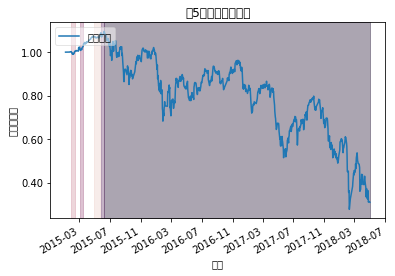

In [9]:
# tearsheet才可以正常显示中文
pf.plot_drawdown_periods(returns, top=5).set_xlabel('日期')

#### 完整`tear sheet`(工作底稿)示例
为算法创建一个完整的工作表。例如，将实时开始日期设置为任意值。

**一般而言，`live_start_date`应设置接近回测结束日期**

In [10]:
live_start_date = returns.index[-20]

/home/ldf/anaconda3/envs/zipline/lib/python3.6/site-packages/numpy-1.14.3-py3.6-linux-x86_64.egg/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


最差回撤,净回撤百分比,波峰日期,波谷日期,回本日期,持续天数
0,74.73,2015-06-08,2018-02-09,NaT,NaN
1,1.80,2015-05-26,2015-05-29,2015-06-08,10
2,1.51,2015-03-02,2015-03-05,2015-03-16,11
3,1.27,2015-01-27,2015-02-02,2015-02-10,11
4,0.74,2015-04-27,2015-05-18,2015-05-22,20


2015-01-05 00:00:00+00:00         NaN
2015-01-06 00:00:00+00:00         NaN
2015-01-07 00:00:00+00:00         NaN
2015-01-08 00:00:00+00:00         NaN
2015-01-09 00:00:00+00:00         NaN
2015-01-12 00:00:00+00:00         NaN
2015-01-13 00:00:00+00:00         NaN
2015-01-14 00:00:00+00:00         NaN
2015-01-15 00:00:00+00:00         NaN
2015-01-16 00:00:00+00:00         NaN
2015-01-19 00:00:00+00:00         NaN
2015-01-20 00:00:00+00:00         NaN
2015-01-21 00:00:00+00:00         NaN
2015-01-22 00:00:00+00:00         NaN
2015-01-23 00:00:00+00:00         NaN
2015-01-26 00:00:00+00:00         NaN
2015-01-27 00:00:00+00:00         NaN
2015-01-28 00:00:00+00:00         NaN
2015-01-29 00:00:00+00:00         NaN
2015-01-30 00:00:00+00:00         NaN
2015-02-02 00:00:00+00:00         NaN
2015-02-03 00:00:00+00:00         NaN
2015-02-04 00:00:00+00:00         NaN
2015-02-05 00:00:00+00:00         NaN
2015-02-06 00:00:00+00:00         NaN
2015-02-09 00:00:00+00:00         NaN
2015-02-10 0

/home/ldf/anaconda3/envs/zipline/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/ldf/anaconda3/envs/zipline/lib/python3.6/site-packages/matplotlib/mathtext.py:849: MathTextWarning: Font 'default' does not have a glyph for '\u7cfb' [U+7cfb]
  MathTextWarning)
/home/ldf/anaconda3/envs/zipline/lib/python3.6/site-packages/matplotlib/mathtext.py:850: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)
/home/ldf/anaconda3/envs/zipline/lib/python3.6/site-packages/matplotlib/mathtext.py:849: MathTextWarning: Font 'default' does not have a glyph for '\u6570' [U+6570]
  MathTextWarning)
/home/ldf/anaconda3/envs/zipline/lib/python3.6/site-packages/matplotlib/mathtext.py:849: MathTextWarning: Font 'default' does not have a glyph for '\u76f8' [U+76f8]
  MathTextWarning)
/home/ldf/an

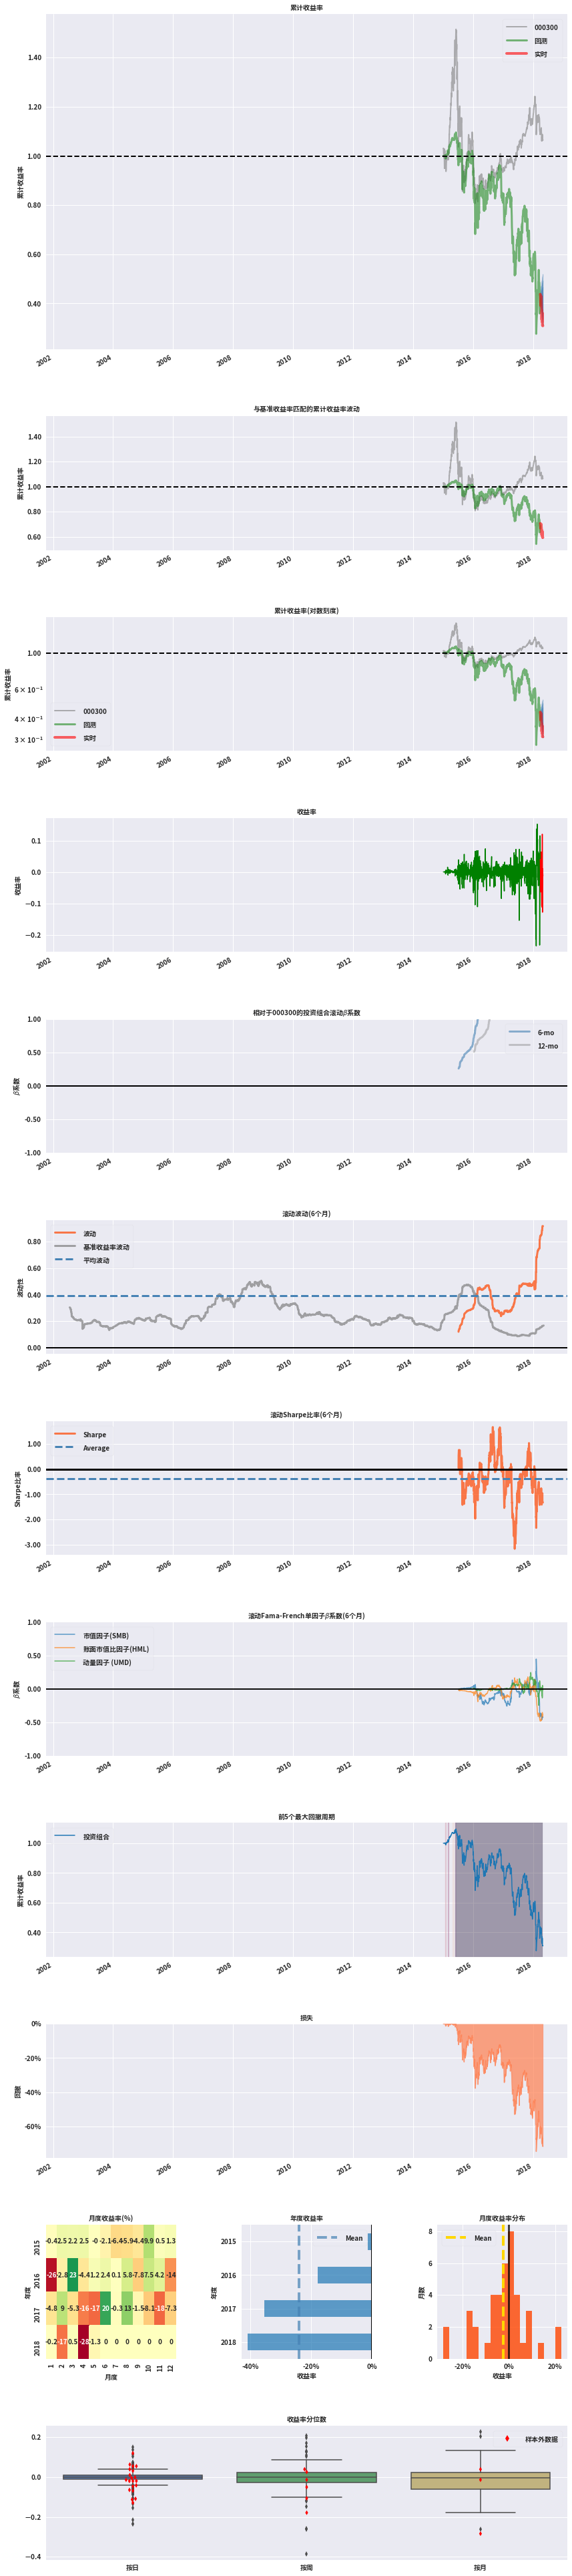

压力事件,mean,min,max
Fall2015,-0.45%,-5.15%,5.64%
New Normal,-0.09%,-23.56%,15.24%


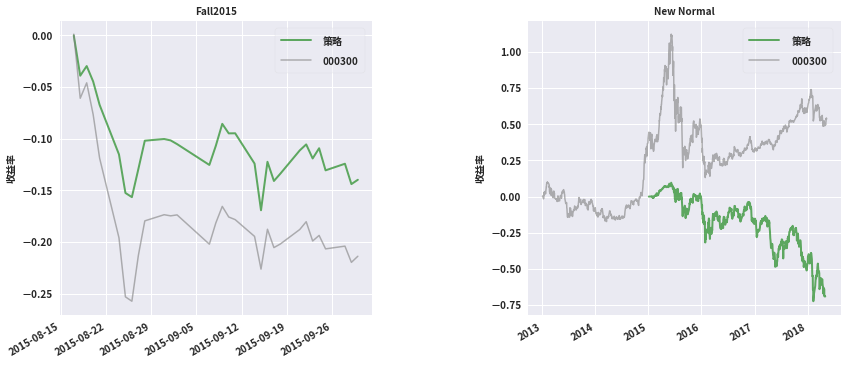

多头头寸(前十位),max
sid,
600158,9.45%
601155,8.08%
600816,6.26%
601111,5.73%
002176,4.98%
600406,4.39%
600276,4.20%
002251,4.15%
600970,4.07%


空头头寸(前十位),max
sid,
300168,-2.50%
002460,-1.40%
601766,-1.06%
300104,-1.03%


头寸绝对值(前十位),max
sid,
600158,9.45%
601155,8.08%
600816,6.26%
601111,5.73%
002176,4.98%
600406,4.39%
600276,4.20%
002251,4.15%
600970,4.07%


头寸绝对值历史清单,max
sid,
600158,9.45%
601155,8.08%
600816,6.26%
601111,5.73%
002176,4.98%
600406,4.39%
600276,4.20%
002251,4.15%
600970,4.07%


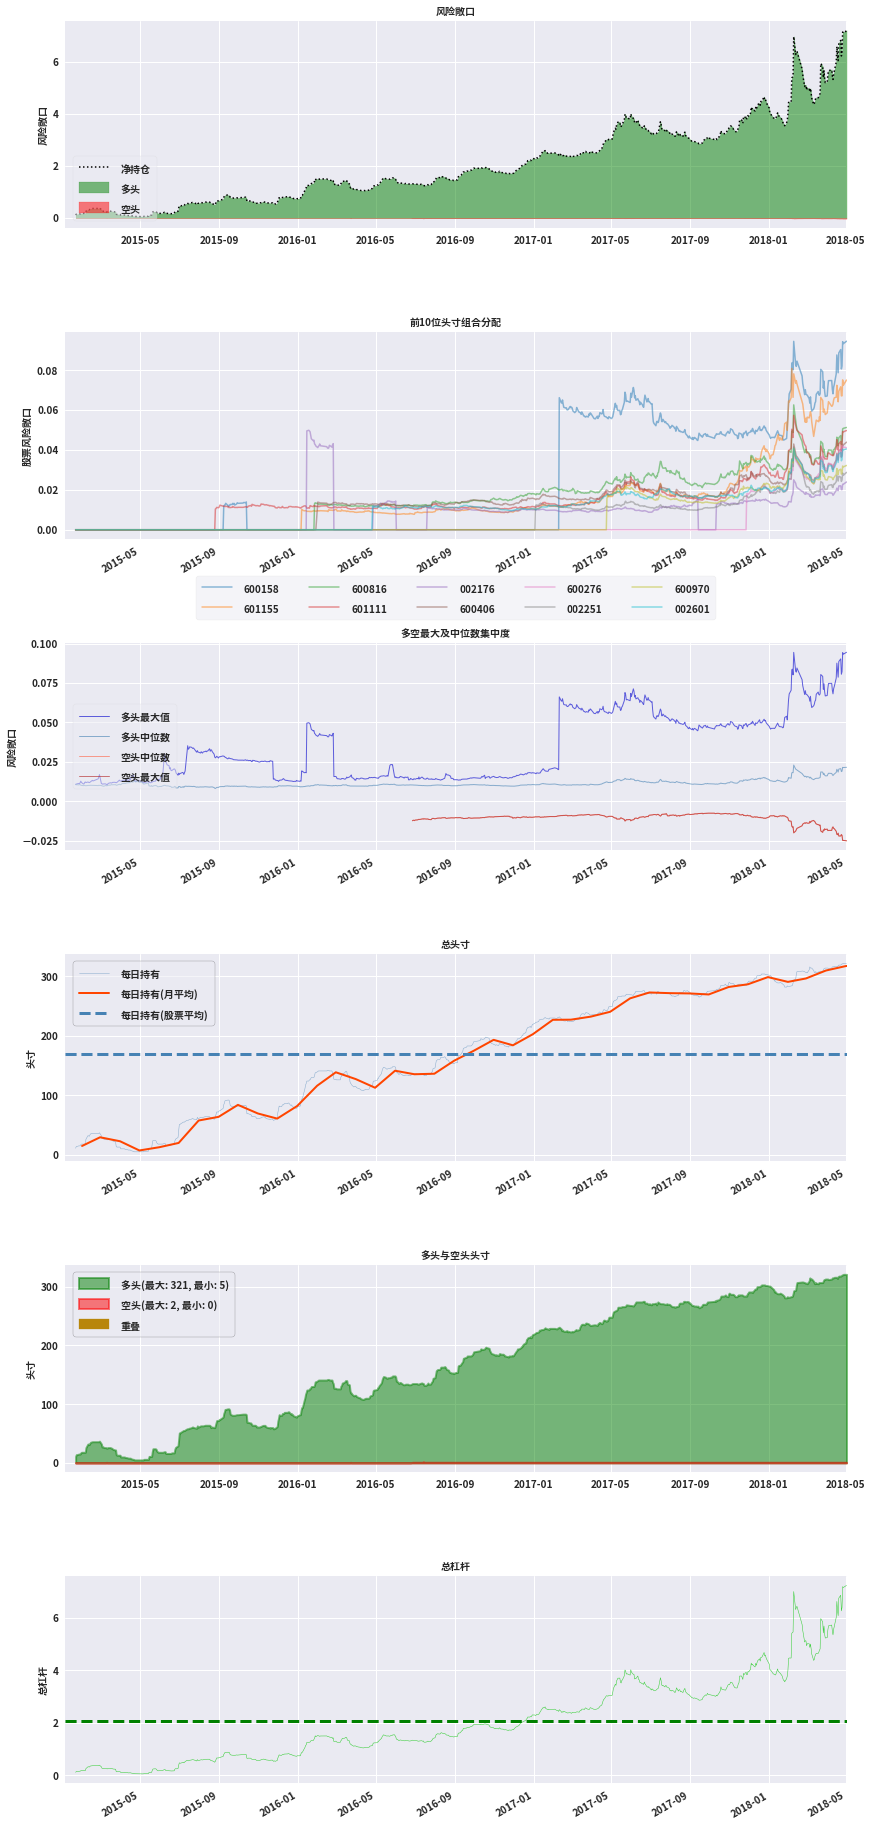

/home/ldf/anaconda3/envs/zipline/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


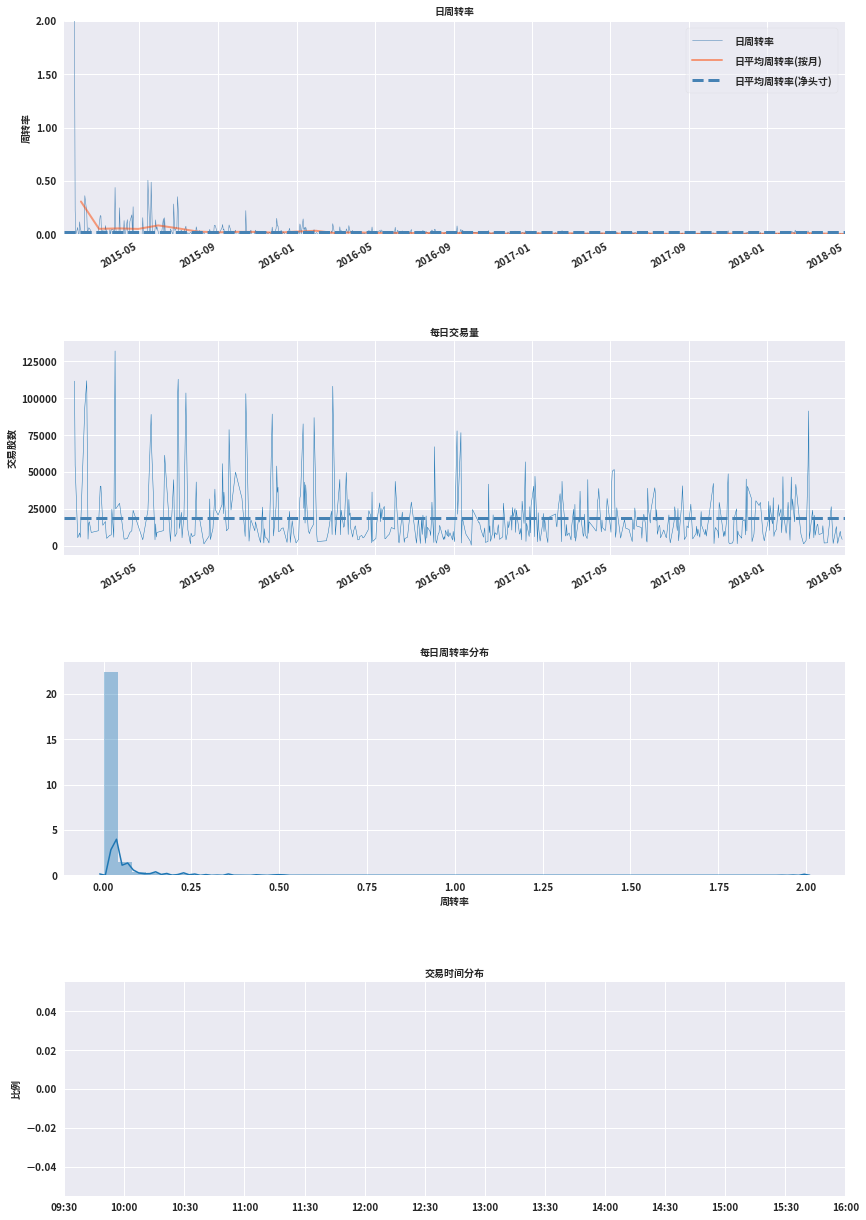

/home/ldf/anaconda3/envs/zipline/lib/python3.6/site-packages/pyfolio-0.8.0-py3.6.egg/pyfolio/round_trips.py:80: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  .agg(stats_dict)
/home/ldf/anaconda3/envs/zipline/lib/python3.6/site-packages/pyfolio-0.8.0-py3.6.egg/pyfolio/round_trips.py:88: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  .agg(stats_dict)
/home/ldf/anaconda3/envs/zipline/lib/python3.6/site-packages/pyfolio-0.8.0-py3.6.egg/pyfolio/round_trips.py:382: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  round_trips.groupby('symbol')['returns'].agg(RETURN_STATS).T


概要统计,所有交易,空头交易,多头交易
完成交易总数,771.00,27.00,744.00
盈利比率,0.44,0.48,0.44
盈利次数,342.00,13.00,329.00
亏损次数,427.00,14.00,413.00
持平次数,2.00,0.00,2.00


盈亏统计,所有交易,空头交易,多头交易
总利润,¥-7706460.00,¥-22673.86,¥-7683786.14
毛利润,¥5377962.02,¥66726.65,¥5311235.37
毛亏损,¥-13084422.03,¥-89400.51,¥-12995021.52
盈亏因子,¥0.41,¥0.75,¥0.41
平均交易净利润,¥-9995.41,¥-839.77,¥-10327.67
盈利交易平均值,¥15725.04,¥5132.82,¥16143.57
亏损交易平均值,¥-30642.67,¥-6385.75,¥-31464.94
盈亏均值因子,¥0.51,¥0.80,¥0.51
交易最大盈利,¥142383.34,¥26154.75,¥142383.34
交易最大亏损,¥-247318.56,¥-32244.60,¥-247318.56


周期统计,所有交易,空头交易,多头交易
平均周期,266 days 10:07:27.888456,88 days 17:31:06.703703,272 days 20:53:18.012096
中位数周期,111 days 00:00:00,46 days 00:00:00,115 days 12:00:00
最长周期,1196 days 17:00:01,673 days 17:00:01,1196 days 17:00:01
最短周期,1 days 00:00:00,1 days 00:00:00,2 days 00:00:00


收益率统计,所有交易,空头交易,多头交易
所有已完成交易平均收益率,-0.37%,-0.01%,-0.38%
盈利交易平均收益率,0.25%,0.12%,0.25%
亏损交易平均收益率,-0.87%,-0.13%,-0.89%
所有已完成交易中位数收益率,-0.05%,-0.01%,-0.07%
盈利交易中位数收益率,0.15%,0.07%,0.15%
亏损交易中位数收益率,-0.72%,-0.04%,-0.76%
最大盈利率,4.54%,0.83%,4.54%
最大亏损率,-7.88%,-0.89%,-7.88%


个股统计,000001,000002,000009,000012,000019,000025,000031,000060,000063,000100,000157,000166,000333,000401,000402,000410,000413,000426,000503,000506,000507,000514,000520,000555,000559,000595,000600,000615,000623,000630,000651,000656,000667,000672,000686,000709,000717,000725,000727,000728,000732,000738,000758,000762,000768,000776,000778,000783,000786,000792,000806,000807,000830,000838,000839,000852,000856,000858,000868,000875,000877,000878,000885,000917,000930,000935,000958,000970,000977,000988,001979,002011,002018,002024,002027,002030,002031,002049,002056,002070,002074,002092,002104,002108,002113,002129,002141,002143,002146,002158,002168,002174,002176,002183,002192,002202,002224,002230,002236,002251,002256,002273,002276,002280,002284,002292,002300,002302,002305,002307,002312,002323,002329,002340,002342,002346,002347,002350,002352,002373,002388,002389,002405,002407,002408,002415,002416,002431,002450,002456,002457,002460,002466,002474,002477,002486,002488,002497,002498,002500,002506,002573,002594,002601,002651,002673,002695,002709,002716,002736,002797,002916,300014,300017,300020,300024,300027,300028,300033,300059,300070,300072,300085,300088,300104,300116,300134,300137,300152,300157,300168,300185,300251,300268,300292,300304,300315,300334,300344,300355,300376,300383,300418,300431,300496,300506,300516,300527,300528,300699,600000,600006,600008,600010,600015,600016,600019,600023,600025,600028,600029,600030,600031,600036,600048,600050,600053,600068,600069,600074,600100,600104,600109,600110,600111,600115,600116,600118,600120,600125,600148,600149,600150,600158,600171,600187,600196,600209,600221,600252,600266,600271,600275,600276,600291,600309,600321,600340,600362,600369,600383,600392,600406,600415,600425,600435,600446,600460,600466,600485,600487,600489,600497,600503,600507,600516,600518,600519,600522,600528,600531,600545,600547,600549,600550,600570,600576,600577,600583,600585,600588,600606,600610,600630,600634,600645,600649,600651,600652,600677,600679,600690,600698,600699,600703,600705,600717,600718,600722,600737,600739,600755,600756,600783,600795,600807,600816,600820,600827,600837,600838,600839,600868,600874,600886,600887,600893,600895,600901,600909,600919,600926,600939,600958,600959,600970,600977,600988,600999,601000,601011,601088,601099,601106,601108,601111,601116,601155,601163,601166,601169,601186,601198,601211,601212,601216,601228,601229,601258,601288,601318,601326,601328,601336,601360,601375,601377,601390,601398,601500,601555,601595,601600,601601,601611,601618,601628,601668,601669,601688,601718,601727,601766,601788,601800,601818,601857,601866,601878,601881,601899,601901,601918,601919,601939,601966,601985,601988,601989,601992,601997,601998,603300,603444,603616,603777,603799,603881,603888,603969,603993,603999
所有已完成交易平均收益率,0.02%,0.13%,-0.12%,-0.94%,-0.05%,-1.78%,-0.08%,-0.03%,0.19%,-0.52%,-1.07%,-1.00%,0.04%,0.11%,-0.05%,-0.73%,-0.33%,-0.47%,0.13%,-1.63%,-0.61%,-1.15%,-0.96%,-1.62%,-0.68%,-1.49%,-1.48%,-1.49%,-0.47%,-0.17%,0.16%,0.11%,-0.72%,0.20%,-1.16%,0.08%,-0.44%,-0.07%,-0.95%,-1.24%,0.21%,-1.46%,-1.31%,-0.32%,0.09%,0.01%,-1.01%,-0.61%,0.95%,-0.03%,-0.84%,-0.15%,-0.05%,-2.25%,-0.25%,-1.47%,-1.62%,0.09%,-1.19%,-2.20%,0.17%,-0.29%,-1.48%,-0.04%,0.18%,-1.15%,-1.51%,-0.36%,0.44%,-0.10%,0.43%,-1.48%,-1.72%,0.13%,0.09%,-1.01%,-1.42%,0.43%,-0.55%,-1.17%,-1.74%,0.11%,-1.50%,-1.62%,-0.42%,-0.07%,-1.50%,-1.07%,0.00%,-0.93%,0.30%,-1.24%,-0.36%,-0.54%,-0.57%,0.64%,-2.00%,0.26%,-0.47%,-0.40%,-0.40%,0.14%,-0.79%,-2.14%,-0.61%,-0.96%,-1.79%,0.25%,-1.07%,0.38%,-1.30%,-2.08%,-2.24%,0.00%,-1.54%,-2.05%,-1.65%,-1.27%,-0.64%,0.00%,-1.51%,-0.96%,-0.01%,-0.05%,0.72%,0.08%,0.18%,-0.28%,0.29%,0.36%,-1.30%,0.04%,-0.06%,-1.20%,-0.80%,-1.86%,-0.70%,-0.99%,-1.95%,-0.54%,-1.88%,-0.88%,-0.70%,0.84%,-1.65%,-0.39%,-0.62%,-0.95%,0.22%,0.42%,-0.11%,-0.25%,-0.65%,-1.39%,-1.22%,-0.39%,-0.15%,-2.38%,0.27%,0.07%,0.01%,-0.43%,-0.05%,0.14%,-0.20%,-2.05%,-1.71%,-0.32%,-1.98%,-1.38%,0.32%,-1.12%,-0.49%,-1.66%,-0.83%,-1.93%,-1.46%,-1.86%,-1.19%,-0.47%,-0.48%,-0.14%,-0.63%,-0.

个股盈利能力(合计PnL/PnL),
symbol,
600158,2.85%
600576,2.40%
601766,2.32%
300104,1.30%
002183,1.26%
600074,1.14%
002276,1.08%
601866,1.04%
300028,0.97%


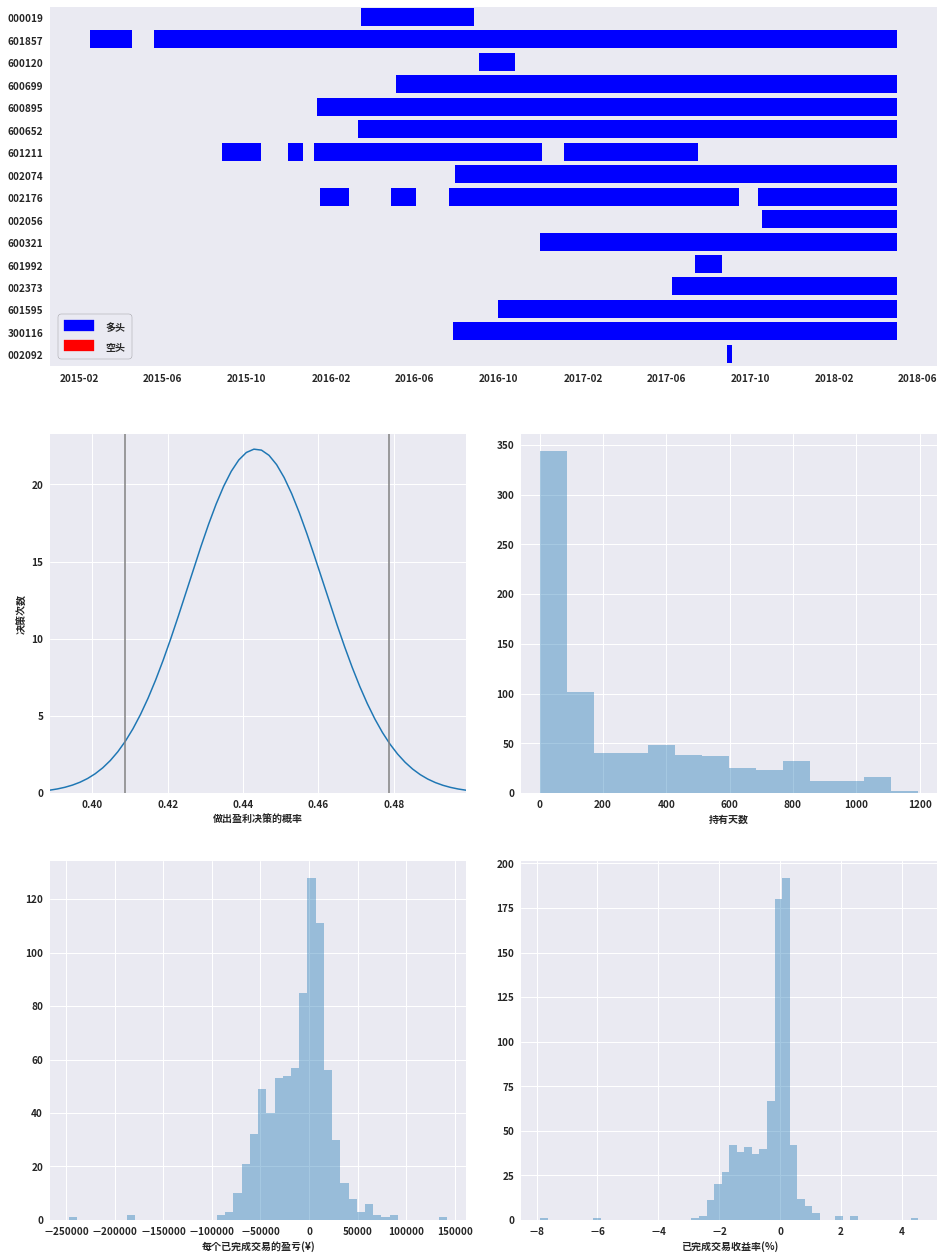

In [11]:
pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions,
                          live_start_date=live_start_date, round_trips=True)

### 整理及补充数据

#### 使用研究模块提取数据
+ 如果存在分红派息，自动调整期间股价
+ 必须与回测期间相同

from zipline.research import run_pipeline

from zipline.pipeline.fundamentals import Fundamentals
from zipline.pipeline import Pipeline
from zipline.pipeline.data import USEquityPricing
from zipline.pipeline.builtin import TopAverageAmount

def make_pipeline():

    return Pipeline(
        columns={
            'close': USEquityPricing.close.latest,
            'sector': Fundamentals.info.sector_code.latest,
        },
        # 只选择成交额前500位的股票
        screen=TopAverageAmount(500))

pipe_output = run_pipeline(make_pipeline(), '2018-1-1', '2018-5-2')

#### 整理数据

# 价格数据必须转换为日期为Index,stock为列名称的宽表
prices = pipe_output.unstack()['close']

prices.head()

factors = pipe_output['sector']
# 行业分类因子期间内不会改变，类型为整数
factors.fillna(method='bfill',inplace=True)
factors.fillna(method='ffill',inplace=True)
factors = factors.astype('int64')

factors.head()

### 因子分析

In [13]:
from alphalens.utils import get_clean_factor_and_forward_returns

/home/ldf/anaconda3/envs/zipline/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [14]:
get_clean_factor_and_forward_returns(factor=factors, prices=prices,max_loss=0)

NameError: name 'factors' is not defined